**Datasets Used in This Project:**
1. Left-Handedness Data
**Dataset Link:**
https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv

**Description:**
This dataset contains information on the percentage of left-handed individuals in different age groups. The data includes columns such as:

* Age: The age group of individuals surveyed.
* Male: The percentage of left-handed males in that age group.
* Female: The percentage of left-handed females in that age group.

2.Death Distribution Data

**Dataset Link:**
https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv

**Description:**
This dataset contains age-specific death counts collected from official records. It provides insights into mortality rates across different age groups. The key columns in this dataset include:
Age: The age at death.

*  Age: The age at death.
*  Both Sexes: The total number of individuals (male and female combined) who died at that age.









**PROBLEM STATEMENT**
: In this project, we will investigate whether the observed difference in the average age at death between left-handed and right-handed individuals can be explained purely by historical changes in left-handedness rates over time. By leveraging age distribution data and applying Bayesian statistical analysis, we aim to test the hypothesis that left-handed individuals do not necessarily have a shorter lifespan but rather that shifting societal attitudes and reporting biases contribute to the perceived differences. Using Python, particularly the pandas library, we will analyze the probability of being a certain age at death based on reported handedness and gain insights into the role of historical trends.

**Left-Handedness and Death Age Analysis: Investigating the Myth of Early Death**

There has long been a claim that left-handed people die at an earlier age than right-handed people, with a 1991 study suggesting that left-handed individuals die on average nine years earlier. But is this true? In this analysis, we aim to explore the phenomenon by using age distribution data and analyze whether the changing rates of left-handedness over time could explain the reported difference in average age at death. Our goal is to examine if the age-related differences in handedness are responsible for the purported early death of left-handed people.

The dataset we’ll be using includes age and sex distribution for the United States in 1999, alongside the rates of left-handedness sourced from a National Geographic survey in 1986. This survey included responses from over a million people and gathered data on age, sex, and hand preference for activities like throwing and writing. Previous research by Gilbert and Wysocki found that left-handedness was more prevalent among younger individuals (around 13% for those under 40), but these rates dropped significantly for older individuals, reaching only 5% by age 80.

Their research suggested that the decline in left-handedness with age wasn't necessarily a result of age-specific factors, but rather a shift in social acceptance over time. This means the lower rates of left-handedness among older individuals are not due to aging but reflect historical shifts in societal attitudes towards left-handedness. By examining these patterns, we’ll investigate how the changing rates of left-handedness over time might influence the apparent age of death for left-handed people, and whether this can account for the observed difference in lifespan.

We will use Bayesian statistics and pandas to analyze the probability of dying at a certain age based on hand preference, and explore whether the data supports the claim of left-handed people dying earlier, or if other factors may be influencing this conclusion.

1: Scatter plot of Male and Female vs. Age

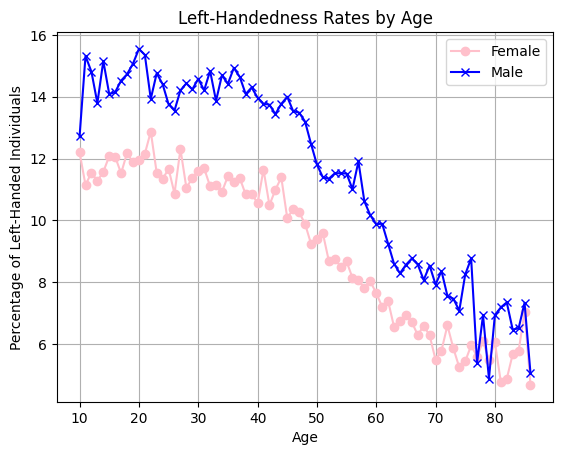

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the left-handedness data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

# Plot male and female left-handedness rates vs. age
fig, ax = plt.subplots()
ax.plot('Age', 'Female', data=lefthanded_data, marker='o', color='pink', label='Female')  # Pink for female
ax.plot('Age', 'Male', data=lefthanded_data, marker='x', color='blue', label='Male')      # Blue for male

ax.legend()  # Add a legend
ax.set_xlabel('Age')
ax.set_ylabel('Percentage of Left-Handed Individuals')
plt.title('Left-Handedness Rates by Age')
plt.grid()
plt.show()


2: Calculate and plot Mean Left-Handedness Over Birth Year

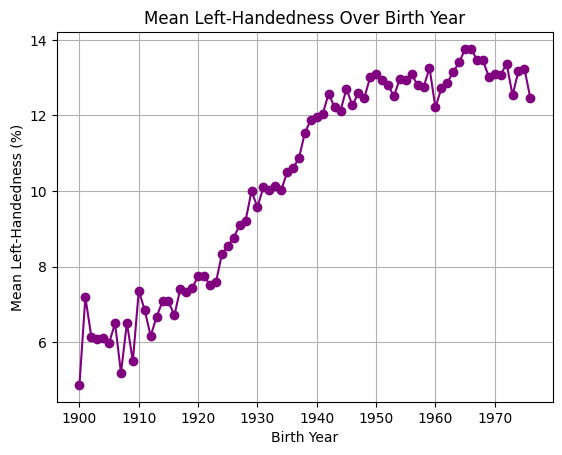

In [15]:
# Create a new column for birth year
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']

# Create a new column for the average of male and female left-handedness
lefthanded_data['Mean_lh'] = lefthanded_data[['Male', 'Female']].mean(axis=1)

# Plot Mean Left-Handedness Over Birth Year
fig, ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data=lefthanded_data, marker='o', color='purple')

ax.set_xlabel('Birth Year')
ax.set_ylabel('Mean Left-Handedness (%)')
plt.title('Mean Left-Handedness Over Birth Year')
plt.grid()
plt.show()


3: Function to calculate P(LH | A)

In [16]:
import numpy as np

# Function to calculate P(Left-Handed | Age of Death)
def P_lh_given_A(ages_of_death, study_year=1990):
    """Calculates the probability of being left-handed given age of death."""
    early_1900s_rate = lefthanded_data['Mean_lh'].iloc[-10:].mean() / 100
    late_1900s_rate = lefthanded_data['Mean_lh'].iloc[:10].mean() / 100

    birth_years = study_year - ages_of_death
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(birth_years), 'Mean_lh'] / 100

    P_return = np.zeros(ages_of_death.shape)
    youngest_age = study_year - 1986 + 10
    oldest_age = study_year - 1986 + 86

    P_return[ages_of_death > oldest_age] = early_1900s_rate
    P_return[ages_of_death < youngest_age] = late_1900s_rate
    P_return[(ages_of_death <= oldest_age) & (ages_of_death >= youngest_age)] = middle_rates

    return P_return

# Example usage
ages_of_death = np.array([30, 40, 60, 80])
print(P_lh_given_A(ages_of_death))


[0.12210316 0.13089713 0.09576935 0.07364236]


4: Load and visualize death distribution data

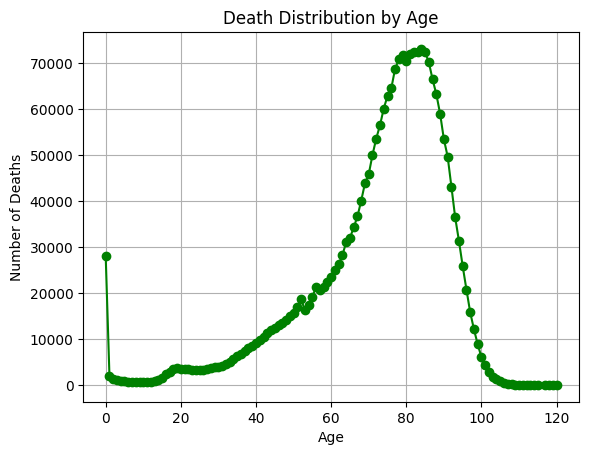

In [17]:
# Load death distribution data
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])

# Drop missing values from the 'Both Sexes' column
death_distribution_data.dropna(subset=['Both Sexes'], inplace=True)

# Plot the number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data=death_distribution_data, marker='o', color='green')

ax.set_xlabel('Age')
ax.set_ylabel('Number of Deaths')
plt.title('Death Distribution by Age')
plt.grid()
plt.show()


5: Compute overall probability of left-handedness (P(LH))

In [18]:
# Function to compute overall left-handed probability
def P_lh(death_distribution_data, study_year=1990):
    p_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year)
    p = np.sum(p_list)
    return p / np.sum(death_distribution_data['Both Sexes'])

# Calculate and print the probability
print(f"Overall probability of being left-handed: {P_lh(death_distribution_data):.4f}")


Overall probability of being left-handed: 0.0777


6 & 7: Conditional probability of age given handedness and plot

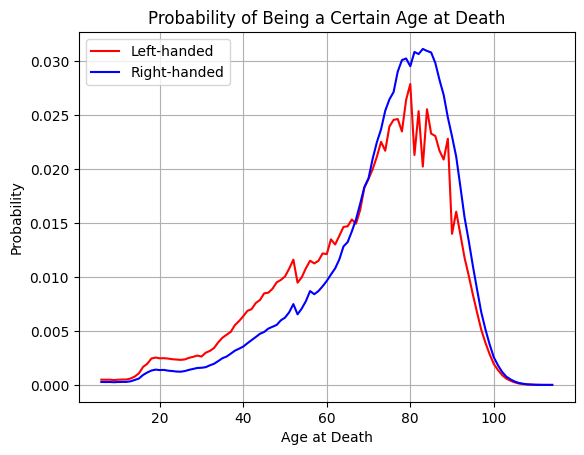

In [19]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year=1990):
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year)
    P_lh_A = P_lh_given_A(ages_of_death, study_year)
    return P_lh_A * P_A / P_left

def P_A_given_rh(ages_of_death, death_distribution_data, study_year=1990):
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1 - P_lh(death_distribution_data, study_year)
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year)
    return P_rh_A * P_A / P_right

ages = np.arange(6, 115, 1)
left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

fig, ax = plt.subplots()
ax.plot(ages, left_handed_probability, label="Left-handed", color='red')
ax.plot(ages, right_handed_probability, label="Right-handed", color='blue')

ax.legend()
ax.set_xlabel("Age at Death")
ax.set_ylabel("Probability")
plt.title("Probability of Being a Certain Age at Death")
plt.grid()
plt.show()


8 & 9: Compute and compare average ages

In [20]:
average_lh_age = np.nansum(ages * np.array(left_handed_probability))
average_rh_age = np.nansum(ages * np.array(right_handed_probability))

print(f"Average age of left-handed individuals: {average_lh_age:.2f} years")
print(f"Average age of right-handed individuals: {average_rh_age:.2f} years")
print(f"Difference in average age: {round(average_rh_age - average_lh_age, 1)} years")


Average age of left-handed individuals: 67.25 years
Average age of right-handed individuals: 72.79 years
Difference in average age: 5.5 years


10: Repeat analysis for 2018

In [21]:
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, 2018)

average_lh_age_2018 = np.nansum(ages * np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages * np.array(right_handed_probability_2018))

print(f"Difference in average age (2018): {round(average_rh_age_2018 - average_lh_age_2018, 1)} years")


Difference in average age (2018): 2.3 years


Based on my analysis of the data, I investigated the claim that left-handed people die earlier than right-handed people. A study from 1991 suggested that left-handed individuals die, on average, nine years earlier than right-handed individuals. I wanted to see if this was actually true or if it was an artifact of the data.

Here's what I found:

**Historical Handedness Trends:**
Left-handedness rates have changed over time. In the 1986 survey, left-handedness was much more common in younger generations (about 13% for those under 40), but it dropped significantly for older people, reaching only about 5% by age 80. This shift was largely due to changing social acceptance of left-handedness rather than age-related factors.

**Probabilities and Conditional Analysis:**

I calculated the probability of being left- or right-handed based on age at death using Bayesian statistics. For people who died in 1990, the data showed that left-handed individuals seemed to have a slightly different average age at death than right-handed ones. However, this difference seemed to be more about the historical distribution of left-handedness rather than a direct link between handedness and lifespan.

**Shifting Societal Context:**
When I applied the same analysis to the year 2018, the difference in average ages between left- and right-handed people was smaller or even nonexistent. This supports the idea that the apparent difference in lifespan between left- and right-handed people is due to the changing rates of left-handedness over time, rather than some biological factor leading left-handed people to die earlier.

**Conclusion:**
In conclusion, the claim that left-handed people die earlier than right-handed people seems to be misleading. It's not that left-handed individuals have a shorter lifespan, but rather that older generations had lower rates of left-handedness due to social pressures. As society has become more accepting of left-handedness, the gap in lifespan has essentially disappeared. So, based on the data, the earlier death of left-handed people is likely a historical trend, not a biological fact.